<a href="https://colab.research.google.com/github/abel-keya/moringa-school-projects/blob/master/Time_Series_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd


In [2]:
import numpy as np
import pandas as pd
url="https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/wiki_machine_learning.csv"
data=pd.read_csv(url,delimiter=',',index_col=0,squeeze=False,delim_whitespace=True,parse_dates=True)
data.head(5)

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
data.tail(5)

,date,count,lang,page,rank,month,title
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning
372,2016-01-20,3559,en,Machine_learning,8708,201601,Machine_learning


In [4]:
data.shape

(384, 7)

In [5]:
data.dtypes

date     object
count     int64
lang     object
page     object
rank      int64
month     int64
title    object
dtype: object

In [6]:
#data_daily.columns = data_daily.columns.str.strip().str.lower().str.replace('   ','')

#To remove white spaces:
# To remove white space everywhere:

data.columns = data.columns.str.replace(' ', '')
#To remove white space at the beginning of string:

#\data_daily.columns = data_daily.columns.str.lstrip()
#To remove white space at the end of string:

data.columns = data.columns.str.rstrip()
#To remove white space at both ends:

data.columns = data.columns.str.strip()
dfStyler = data.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
pd.option_context('display.colheader_justify','centre')
data.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [7]:
#add datetime colunm in the standard format
#data['date'] = data['day'].map(str) + '/' + data['month'].map(str) + '/' + data['year'].map(str) + ' ' + data_daily['hour'].map(str) + ':' + data_daily['minute'].map(str)
data['date'].apply(lambda x: x.strip())
data['date'] = pd.to_datetime(data['date'])
data['month'] = pd.to_datetime(data['month'])
data.dtypes

date     datetime64[ns]
count             int64
lang             object
page             object
rank              int64
month    datetime64[ns]
title            object
dtype: object

In [8]:
# import datetime class from datetime module
from datetime import datetime

# get current date
datetime_object = datetime.now()
print(datetime_object)
print('Type :- ',type(datetime_object))

2019-12-12 17:54:47.553922
Type :-  <class 'datetime.datetime'>


In [9]:
#DataFrame’s index to a DatetimeIndex
data_daily = data.set_index('date')
data_daily.head(3)

,count,lang,page,rank,month,title
date,,,,,,
2015-01-01,1414,en,Machine_learning,8708,1970-01-01 00:00:00.000201501,Machine_learning
2015-01-02,1920,en,Machine_learning,8708,1970-01-01 00:00:00.000201501,Machine_learning
2015-01-03,1338,en,Machine_learning,8708,1970-01-01 00:00:00.000201501,Machine_learning


In [10]:
data_daily.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-16', '2016-01-17', '2016-01-18',
               '2016-01-19', '2016-01-20'],
              dtype='datetime64[ns]', name='date', length=384, freq=None)

In [11]:
data_daily.dtypes

count             int64
lang             object
page             object
rank              int64
month    datetime64[ns]
title            object
dtype: object

In [12]:
# Add columns with year, month, and weekday name
data_daily['Year'] = data_daily.index.year
data_daily['Month'] = data_daily.index.month
data_daily['Weekday Name'] = data_daily.index.weekday_name
#Display a random sampling of 5 rows
data_daily.sample(5, random_state=0)

,count,lang,page,rank,month,title,Year,Month,Weekday Name
date,,,,,,,,,
2015-08-02,1322,en,Machine_learning,8708,1970-01-01 00:00:00.000201508,Machine_learning,2015,8,Sunday
2015-05-05,2840,en,Machine_learning,8708,1970-01-01 00:00:00.000201505,Machine_learning,2015,5,Tuesday
2015-07-10,2106,en,Machine_learning,8708,1970-01-01 00:00:00.000201507,Machine_learning,2015,7,Friday
2015-02-22,1614,en,Machine_learning,8708,1970-01-01 00:00:00.000201502,Machine_learning,2015,2,Sunday
2015-09-08,2788,en,Machine_learning,8708,1970-01-01 00:00:00.000201509,Machine_learning,2015,9,Tuesday


In [0]:
# Display figures inline in  notebook
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

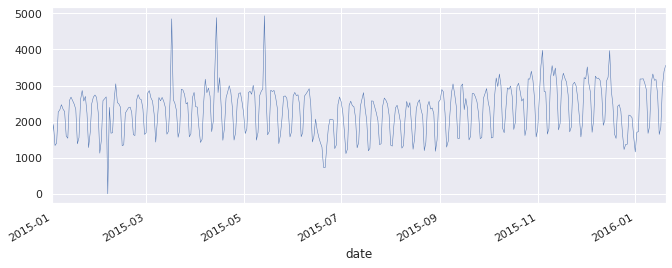

In [0]:
#line plot of the count column using the DataFrame’s plot() method.
data_daily['count'].plot(linewidth=0.5);

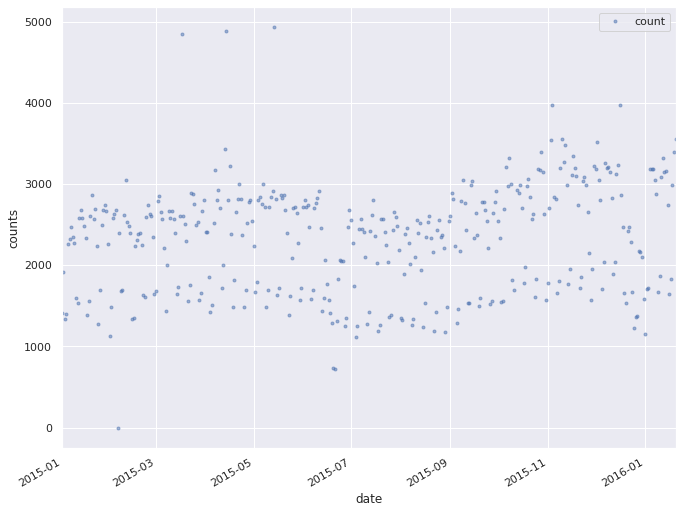

In [15]:
#the plot() method has chose  tick locations (every 20 days) and labels (the years) for the x-axis, 
#with so many data points, the line plot is crowded and hard to read. 
#plotting the data as dots instead
cols_plot = ['count']
axes = data_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('counts')

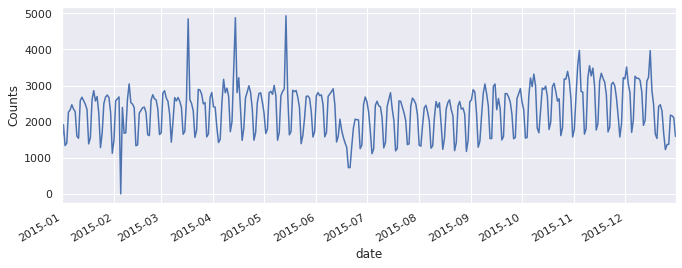

In [17]:
ax = data_daily.loc['2015', 'count'].plot()
ax.set_ylabel('Counts');

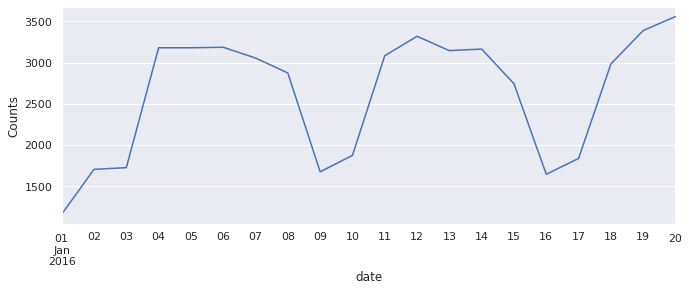

In [16]:
ax = data_daily.loc['2016', 'count'].plot()
ax.set_ylabel('Counts');

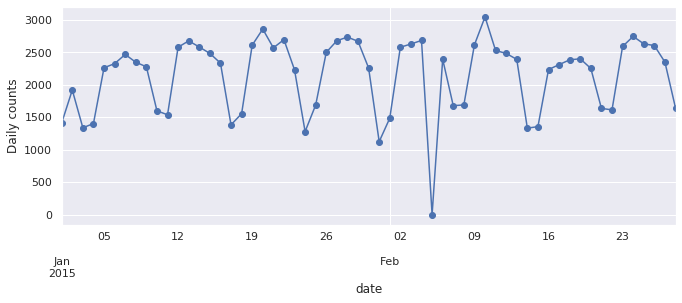

In [0]:
ax = data_daily.loc['2015-01':'2015-02', 'count'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily counts');

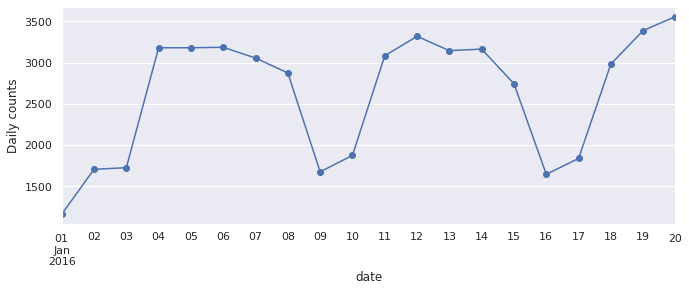

In [21]:
ax = data_daily.loc['2016-01':'2016-02', 'count'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily counts');

In [0]:
#Customizing time series plots
import matplotlib.dates as mdates

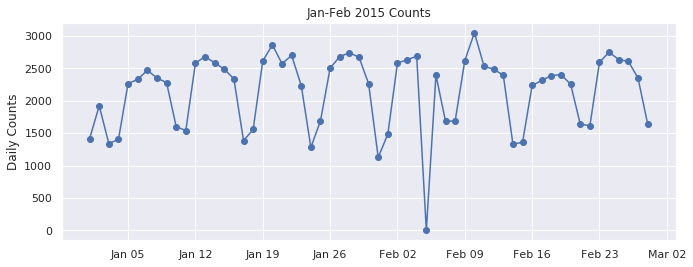

In [23]:
fig, ax = plt.subplots()
ax.plot(data_daily.loc['2015-01':'2015-02', 'count'], marker='o', linestyle='-')
ax.set_ylabel('Daily Counts')
ax.set_title('Jan-Feb 2015 Counts')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

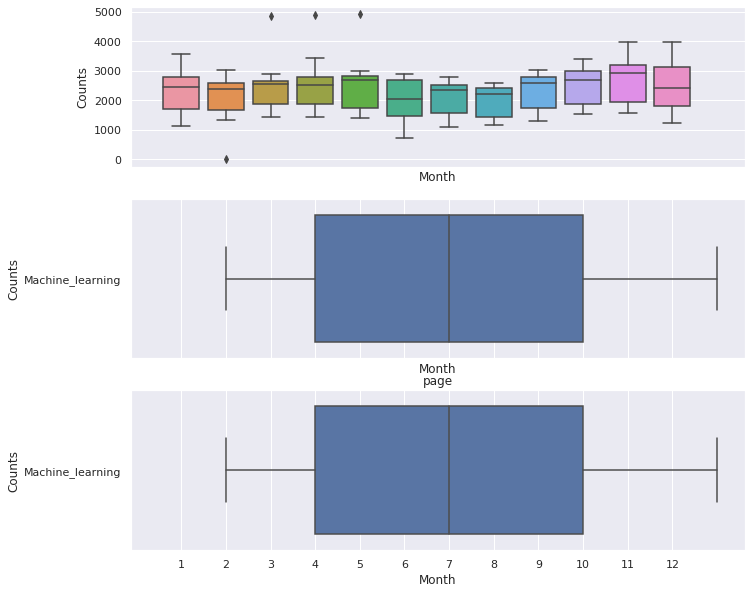

In [24]:
#Seasonality
#explore the seasonality of our data with box plots, using seaborn’s boxplot() function to group 
#the data by different time periods and display the distributions for each group
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['count', 'title', 'page'], axes):
  sns.boxplot(data=data_daily, x='Month', y=name, ax=ax)
  ax.set_ylabel('Counts')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
  ax.set_xlabel('')

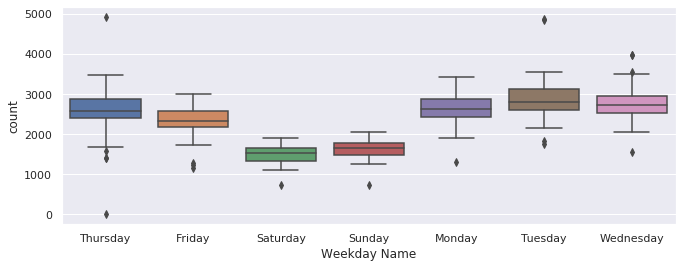

In [25]:
#time series by day of the week
sns.boxplot(data=data_daily, x='Weekday Name', y='count');

In [0]:
#Other techniques for analyzing seasonality include autocorrelation plots, 
#which plot the correlation coefficients of the time series with itself at different time lags.
#Time series with strong seasonality can often be well represented with models that decompose 
#the signal into seasonality and a long-term trend, and these models can be used to forecast 
#future values of the time series

In [0]:
#Frequencies
#When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), 
#the time series can be associated with a frequency
#use the date_range() function to create a sequence of uniformly spaced dates 


In [28]:
import matplotlib.dates as mdates
pd.date_range('2015-03-10', '2015-03-15', freq='D')


DatetimeIndex(['2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
               '2015-03-14', '2015-03-15'],
              dtype='datetime64[ns]', freq='D')

In [31]:
#The resulting DatetimeIndex has an attribute freq with a value of 'D', indicating daily frequency. 
#Available frequencies in pandas include hourly ('H'), calendar daily ('D'), business daily ('B'), weekly ('W'), monthly ('M'), quarterly ('Q'), annual ('A'),
#Frequencies can also be specified as multiples of any of the base frequencies, for example '5D' for every five days.
#date range at hourly frequency, specifying the start date and number of periods, instead of the start date and end date.
pd.date_range('2016-01-20', periods=8, freq='H')

DatetimeIndex(['2016-01-20 00:00:00', '2016-01-20 01:00:00',
               '2016-01-20 02:00:00', '2016-01-20 03:00:00',
               '2016-01-20 04:00:00', '2016-01-20 05:00:00',
               '2016-01-20 06:00:00', '2016-01-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [32]:
data_daily.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-16', '2016-01-17', '2016-01-18',
               '2016-01-19', '2016-01-20'],
              dtype='datetime64[ns]', name='date', length=384, freq=None)

In [36]:
#To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2015-11-01', '2016-01-01'])
# Select the specified dates and just the count column
count_sample = data_daily.loc[times_sample, ['count']].copy()
count_sample

,count
2015-11-01,1786
2016-01-01,1159


In [39]:
#RESAMPLING
## Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['count']
# Resample to weekly frequency, aggregating with mean
data_weekly_mean = data_daily[data_columns].resample('W').mean()
data_weekly_mean.head(3)

,count
date,
2015-01-04,1519.000000
2015-01-11,2118.142857
2015-01-18,2229.142857


In [42]:
print(data_daily.shape[0])
print(data_weekly_mean.shape[0])

384
56


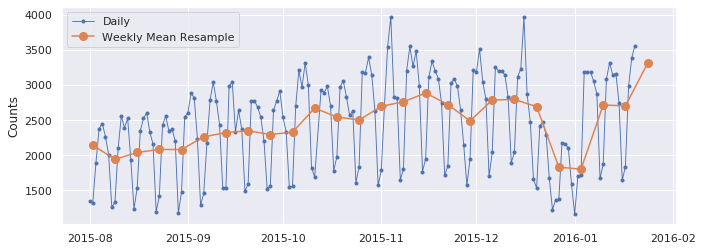

In [41]:
#daily and weekly count time series together over a single six-month period to compare them.
# Start and end of the date range to extract
start, end = '2015-08', '2016-02'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data_daily.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.9, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Counts')
ax.legend();

In [44]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
data_monthly = data_daily[data_columns].resample('M').sum(min_count=28)
data_monthly.head(3)

,count
date,
2015-01-31,66424.0
2015-02-28,60322.0
2015-03-31,74934.0


In [0]:
#Unlike aggregating with mean(), which sets the output to NaN for any period with all missing data, 
#the default behavior of sum() will return output of 0 as the sum of missing data. 
#the min_count parameter to change this behavior.

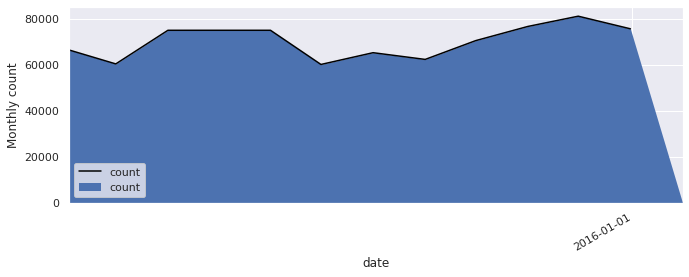

In [46]:
#explore the monthly time series by plotting the count as a line plot, 
 #together as a stacked area plot.
 fig, ax = plt.subplots()
ax.plot(data_monthly['count'], color='black', label='count')
data_monthly[['count']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly count');


In [50]:
#resampling to annual frequency and computing the ratio of counts for each year.
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
data_annual = data_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2015-12-31', '2016-01-31', etc.)  set the index to the year component
data_annual = data_annual.set_index(data_annual.index.year)
data_annual.index.name = 'Year'
# Compute the ratio of count to count
data_annual['count/count'] = data_annual['count'] / data_annual['count']
data_annual.tail(3)

,count,count/count
Year,,
2015,842801.0,1.0
2016,NaN,NaN


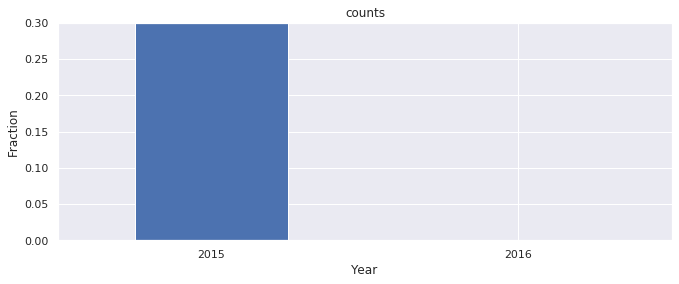

In [51]:
# Plot from 2015 onwards, because there is no count data in earlier years
ax = data_annual.loc[2015:, 'count/count'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('counts')
plt.xticks(rotation=0);

In [52]:
#Rolling windows
#Rolling window operations are transformation for time series data
#Similar to downsampling, rolling windows split the data into time windows 
#the data in each window is aggregated with a function such as mean(), median(), sum()
#unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, 
#rolling windows overlap and “roll” along at the same frequency as the data,  
#the transformed time series is at the same frequency as the original time series.
#By default, all data points within a window are equally weighted in the aggregation, 
#can be changed by specifying window types such as Gaussian, triangular
#use the rolling() method to compute the 7-day rolling mean of our daily data. 
#use the center=True argument to label each window at its midpoint
# Compute the centered 7-day rolling mean
data_7d = data_daily[data_columns].rolling(7, center=True).mean()
data_7d.head(10)

,count
date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,1876.571429
2015-01-05,2010.142857
2015-01-06,2061.428571
2015-01-07,2098.857143
2015-01-08,2118.142857
2015-01-09,2163.428571


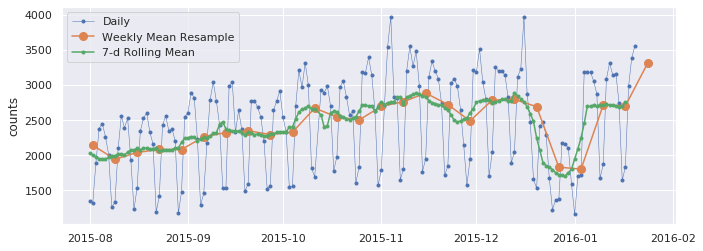

In [53]:
#visualize the differences between rolling mean and resampling
# Start and end of the date range to extract
start, end = '2015-08', '2016-02'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(data_daily.loc[start:end, 'count'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'count'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(data_7d.loc[start:end, 'count'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('counts')
ax.legend();

In [0]:
#data points in the rolling mean time series have the same spacing as the daily data, 
# the curve is smoother because higher frequency variability has been averaged out. 
#In the rolling mean time series, the peaks and troughs tend to align closely with the peaks and troughs of the daily time series. 
#In contrast, the peaks and troughs in the weekly resampled time series are less closely aligned with the daily time series, 
#since the resampled time series is at a coarser granularity.

In [0]:
#Trends
#Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. 
#An easy way to visualize these trends is with rolling means at different time scales.

#A rolling mean tends to smooth a time series by averaging out variations at frequencies much higher than the window size and averaging out any seasonality on a time scale equal to the window size. 
#This allows lower-frequency variations in the data to be explored. Since our electricity consumption time series has weekly and yearly seasonality, 
#let’s look at rolling means on those two time scales.
## The min_periods=360 argument accounts for a few isolated missing days in the
# count time series
data_365d = data_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()


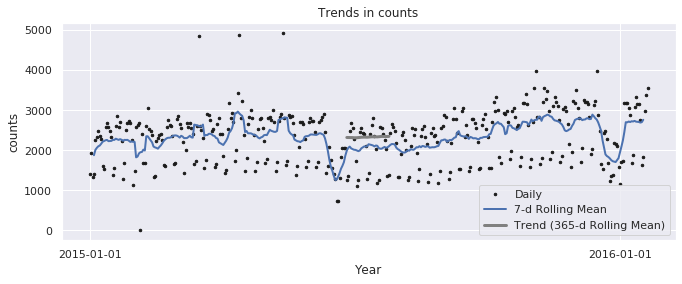

In [59]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(data_daily['count'], marker='.', markersize=5, color='0.1',
linestyle='None', label='Daily')
ax.plot(data_7d['count'], linewidth=2, label='7-d Rolling Mean')
ax.plot(data_365d['count'], color='0.5', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('counts')
ax.set_title('Trends in counts');

In [0]:
#the 7-day rolling mean has smoothed out all the weekly seasonality,
# while preserving the yearly seasonality. The 7-day rolling mean reveals that while count is typically higher in winter and lower in summer, 
#there is a dramatic decrease for a few weeks every winter at the end of December and beginning of January, during the holidays.

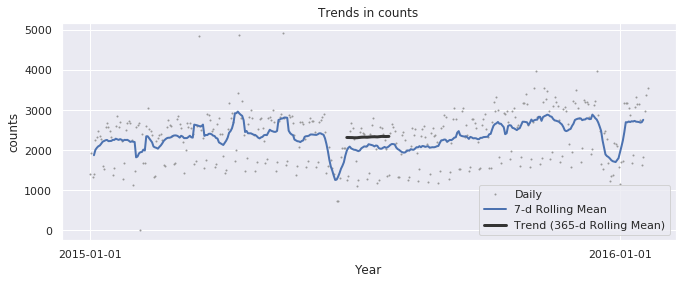

In [61]:
#plot the 7-day and 365-day rolling mean electricity consumption, 
#along with the daily time series.
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(data_daily['count'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(data_7d['count'], linewidth=2, label='7-d Rolling Mean')
ax.plot(data_365d['count'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('counts')
ax.set_title('Trends in counts');

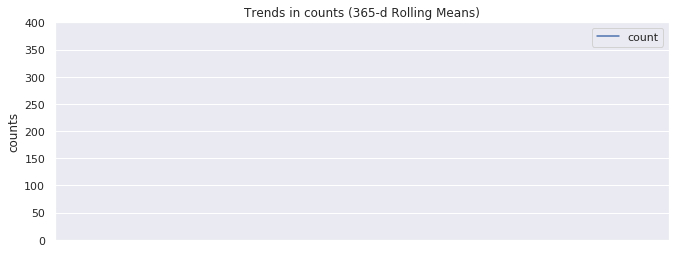

In [64]:
# Plot 365-day rolling mean time series of counts
fig, ax = plt.subplots()
for nm in ['count']:
    ax.plot(data_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('counts')
    ax.set_title('Trends in counts (365-d Rolling Means)');